In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv('E-com_Data.csv')
dataset.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177.0,29-10-2017,6.0,3:36:00 PM,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422.0,05-10-2017,2.0,2:53:00 PM,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422.0,12-10-2017,2.0,2:53:00 PM,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633.0,22-08-2017,3.0,2:47:00 PM,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422.0,10-10-2017,2.0,2:53:00 PM,944.0,1888.0,Location 1,NaN,NaN,NaN


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541116 entries, 0 to 541115
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         404189 non-null  float64
 1   Item Code          537979 non-null  object 
 2   InvoieNo           537979 non-null  float64
 3   Date of purchase   537979 non-null  object 
 4   Quantity           537979 non-null  float64
 5   Time               537979 non-null  object 
 6   price per Unit     537979 non-null  float64
 7   Price              537979 non-null  float64
 8   Shipping Location  537979 non-null  object 
 9   Cancelled_status   8345 non-null    object 
 10  Reason of return   3 non-null       object 
 11  Sold as set        0 non-null       float64
dtypes: float64(6), object(6)
memory usage: 49.5+ MB


In [4]:
dataset.nunique()

CustomerID            4349
Item Code             4009
InvoieNo             24928
Date of purchase       381
Quantity               462
Time                   770
price per Unit        2900
Price                13529
Shipping Location       20
Cancelled_status         1
Reason of return         2
Sold as set              0
dtype: int64

In [5]:
print(dataset.isnull().sum()/len(dataset)*100)

CustomerID            25.304556
Item Code              0.579728
InvoieNo               0.579728
Date of purchase       0.579728
Quantity               0.579728
Time                   0.579728
price per Unit         0.579728
Price                  0.579728
Shipping Location      0.579728
Cancelled_status      98.457817
Reason of return      99.999446
Sold as set          100.000000
dtype: float64


In [6]:
dataset.duplicated().sum()

3145

In [7]:
dataset = dataset.rename(columns = {'InvoieNo':"InvoiceNo",
                                    "Date of purchase":"Date"})

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541116 entries, 0 to 541115
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         404189 non-null  float64
 1   Item Code          537979 non-null  object 
 2   InvoiceNo          537979 non-null  float64
 3   Date               537979 non-null  object 
 4   Quantity           537979 non-null  float64
 5   Time               537979 non-null  object 
 6   price per Unit     537979 non-null  float64
 7   Price              537979 non-null  float64
 8   Shipping Location  537979 non-null  object 
 9   Cancelled_status   8345 non-null    object 
 10  Reason of return   3 non-null       object 
 11  Sold as set        0 non-null       float64
dtypes: float64(6), object(6)
memory usage: 49.5+ MB


In [9]:
dataset.isnull().sum()

CustomerID           136927
Item Code              3137
InvoiceNo              3137
Date                   3137
Quantity               3137
Time                   3137
price per Unit         3137
Price                  3137
Shipping Location      3137
Cancelled_status     532771
Reason of return     541113
Sold as set          541116
dtype: int64

In [10]:
# Note : pls check with your stakeholder as well as your change management team
# pls drop it
dataset = dataset.drop_duplicates(ignore_index=True)

In [11]:
dataset.isnull().sum()

CustomerID           133790
Item Code                 1
InvoiceNo                 1
Date                      1
Quantity                  1
Time                      1
price per Unit            1
Price                     1
Shipping Location         1
Cancelled_status     529626
Reason of return     537968
Sold as set          537971
dtype: int64

In [12]:
# missing customerid - we have to drop now

dataset = dataset.dropna(subset=['CustomerID'])

In [13]:
dataset.isnull().sum()

CustomerID                0
Item Code                 0
InvoiceNo                 0
Date                      0
Quantity                  0
Time                      0
price per Unit            0
Price                     0
Shipping Location         0
Cancelled_status     395998
Reason of return     404181
Sold as set          404181
dtype: int64

In [14]:
dataset.head()

,CustomerID,Item Code,InvoiceNo,Date,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177.0,29-10-2017,6.0,3:36:00 PM,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422.0,05-10-2017,2.0,2:53:00 PM,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422.0,12-10-2017,2.0,2:53:00 PM,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633.0,22-08-2017,3.0,2:47:00 PM,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422.0,10-10-2017,2.0,2:53:00 PM,944.0,1888.0,Location 1,NaN,NaN,NaN


In [15]:
dataset['Date'] = pd.to_datetime(dataset['Date'])

In [16]:
dataset.head()

,CustomerID,Item Code,InvoiceNo,Date,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177.0,2017-10-29,6.0,3:36:00 PM,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422.0,2017-05-10,2.0,2:53:00 PM,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422.0,2017-12-10,2.0,2:53:00 PM,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633.0,2017-08-22,3.0,2:47:00 PM,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422.0,2017-10-10,2.0,2:53:00 PM,944.0,1888.0,Location 1,NaN,NaN,NaN


In [17]:
# creating one more date
dataset['Date1'] = dataset['Date']

In [18]:
dataset.head()

,CustomerID,Item Code,InvoiceNo,Date,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set,Date1
0,4355.0,15734,398177.0,2017-10-29,6.0,3:36:00 PM,321.0,1926.0,Location 1,NaN,NaN,NaN,2017-10-29
1,4352.0,14616,394422.0,2017-05-10,2.0,2:53:00 PM,870.0,1740.0,Location 1,NaN,NaN,NaN,2017-05-10
2,4352.0,14614,394422.0,2017-12-10,2.0,2:53:00 PM,933.0,1866.0,Location 1,NaN,NaN,NaN,2017-12-10
3,4352.0,85014B,388633.0,2017-08-22,3.0,2:47:00 PM,623.0,1869.0,Location 1,NaN,NaN,NaN,2017-08-22
4,4352.0,15364,394422.0,2017-10-10,2.0,2:53:00 PM,944.0,1888.0,Location 1,NaN,NaN,NaN,2017-10-10


In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404181 entries, 0 to 537940
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   CustomerID         404181 non-null  float64       
 1   Item Code          404181 non-null  object        
 2   InvoiceNo          404181 non-null  float64       
 3   Date               404181 non-null  datetime64[ns]
 4   Quantity           404181 non-null  float64       
 5   Time               404181 non-null  object        
 6   price per Unit     404181 non-null  float64       
 7   Price              404181 non-null  float64       
 8   Shipping Location  404181 non-null  object        
 9   Cancelled_status   8183 non-null    object        
 10  Reason of return   0 non-null       object        
 11  Sold as set        0 non-null       float64       
 12  Date1              404181 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(6), object(5)


In [20]:
dataset['Date'].describe()

count                  404181
unique                    381
top       2017-11-24 00:00:00
freq                     2522
first     2016-02-12 00:00:00
last      2017-12-19 00:00:00
Name: Date, dtype: object

In [21]:
# Recency = Latest date - Last invoice date
# Frequency = count of invoice no of transaction(s)
# Monetary = Sum of Total

import datetime as dt

latest_date = dt.datetime(2017,12,20)

In [22]:
RFMScores = dataset.groupby('CustomerID').agg({'Date1': 
                                               lambda x:(latest_date - x.max()).days,
                                              'Date': lambda x : x.nunique(),
                                              'Price': lambda x: x.sum()})


# Convert invoice date into int
RFMScores['Date'] = RFMScores['Date'].astype(int)

# Raname columns name as Recency, Frequency and Monetory

RFMScores.rename(columns={'Date1':'Recency', 'Date':'Frequency',
                         'Price':'Monetary'}, inplace=True)

RFMScores.reset_index().head(10)

,CustomerID,Recency,Frequency,Monetary
0,2.0,4,63,553704.0
1,3.0,77,18,257404.0
2,4.0,20,10,176613.0
3,5.0,18,7,41976.0
4,6.0,9,42,151822.0
5,7.0,208,4,9410.0
6,8.0,234,10,135550.0
7,9.0,15,7,65832.0
8,10.0,16,22,331601.0
9,11.0,9,10,771439.0


In [23]:
RFMScores.tail()

,Recency,Frequency,Monetary
CustomerID,,,
4368.0,17,7,20480.0
4369.0,181,6,10774.0
4370.0,12,11,24962.0
4371.0,4,132,280608.0
4372.0,51,23,262820.0


In [24]:
RFMScores.Recency.describe()

count    4349.000000
mean       61.445160
std        89.656941
min         1.000000
25%        10.000000
50%        19.000000
75%        73.000000
max       617.000000
Name: Recency, dtype: float64

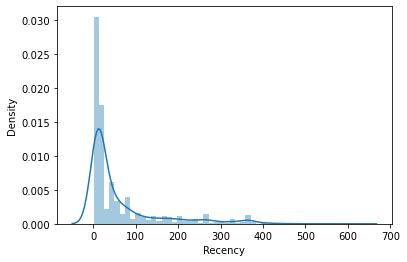

In [25]:
x = RFMScores['Recency']
ax = sns.distplot(x)

In [26]:
RFMScores.Frequency.describe()

count    4349.000000
mean       27.396643
std        33.594882
min         1.000000
25%         9.000000
50%        16.000000
75%        33.000000
max       378.000000
Name: Frequency, dtype: float64

In [27]:
RFMScores.Monetary.describe()

count    4.349000e+03
mean     2.299380e+05
std      8.572589e+05
min     -5.037200e+04
25%      3.814800e+04
50%      8.365500e+04
75%      2.056120e+05
max      3.553619e+07
Name: Monetary, dtype: float64

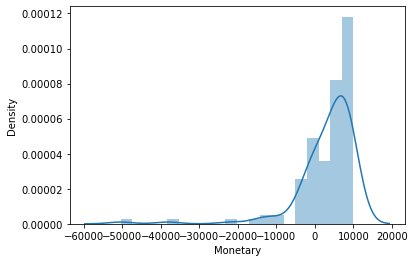

In [28]:
x = RFMScores.query('Monetary < 10000')['Monetary']

ax = sns.distplot(x)

In [29]:
# split the data into 4 segment basis quantile

quantils = RFMScores.quantile(q=[0.25, 0.5, 0.75])
quantils = quantils.to_dict()

In [30]:
quantils

{'Recency': {0.25: 10.0, 0.5: 19.0, 0.75: 73.0},
 'Frequency': {0.25: 9.0, 0.5: 16.0, 0.75: 33.0},
 'Monetary': {0.25: 38148.0, 0.5: 83655.0, 0.75: 205612.0}}

In [31]:
# Functions to create R, F and M segments

def RScores(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4
    
def FScores(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1
    

In [32]:
RFMScores.columns

Index(['Recency', 'Frequency', 'Monetary'], dtype='object')

In [33]:
RFMScores['R'] = RFMScores['Recency'].apply(RScores, args=('Recency',quantils))
RFMScores['F'] = RFMScores['Frequency'].apply(FScores, args=('Frequency',quantils))
RFMScores['M'] = RFMScores['Monetary'].apply(FScores, args=('Monetary',quantils))
RFMScores.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
2.0,4,63,553704.0,1,1,1
3.0,77,18,257404.0,4,2,1
4.0,20,10,176613.0,3,3,2
5.0,18,7,41976.0,2,4,3
6.0,9,42,151822.0,1,1,2


In [34]:
RFMScores.head(20)

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
2.0,4,63,553704.0,1,1,1
3.0,77,18,257404.0,4,2,1
4.0,20,10,176613.0,3,3,2
5.0,18,7,41976.0,2,4,3
6.0,9,42,151822.0,1,1,2
7.0,208,4,9410.0,4,4,4
8.0,234,10,135550.0,4,3,2
9.0,15,7,65832.0,2,4,3
10.0,16,22,331601.0,2,2,1


In [35]:
RFMScores['RFMGroup'] = RFMScores.R.map(str)+RFMScores.F.map(str)+RFMScores.M.map(str)
RFMScores['RFMScore'] = RFMScores[['R','F','M']].sum(axis=1)

RFMScores.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
CustomerID,,,,,,,,
2.0,4,63,553704.0,1,1,1,111,3
3.0,77,18,257404.0,4,2,1,421,7
4.0,20,10,176613.0,3,3,2,332,8
5.0,18,7,41976.0,2,4,3,243,9
6.0,9,42,151822.0,1,1,2,112,4


In [36]:
Loyalty_level = ['Platinum','Gold','Silver','Bronze']
Score_cuts = pd.qcut(RFMScores.RFMScore, q=4, labels = Loyalty_level)
RFMScores['RFM_Loyalty_level'] = Score_cuts.values
RFMScores.reset_index().head(20)

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_level
0,2.0,4,63,553704.0,1,1,1,111,3,Platinum
1,3.0,77,18,257404.0,4,2,1,421,7,Gold
2,4.0,20,10,176613.0,3,3,2,332,8,Gold
3,5.0,18,7,41976.0,2,4,3,243,9,Silver
4,6.0,9,42,151822.0,1,1,2,112,4,Platinum
5,7.0,208,4,9410.0,4,4,4,444,12,Bronze
6,8.0,234,10,135550.0,4,3,2,432,9,Silver
7,9.0,15,7,65832.0,2,4,3,243,9,Silver
8,10.0,16,22,331601.0,2,2,1,221,5,Platinum
9,11.0,9,10,771439.0,1,3,1,131,5,Platinum


In [37]:
# Filter RFMGroup = 111
RFMScores[RFMScores['RFMGroup']=='111'].sort_values('Monetary', ascending=False).reset_index().head(10)

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_level
0,1704.0,3,235,35536194.0,1,1,1,111,3,Platinum
1,1896.0,2,356,17743855.0,1,1,1,111,3,Platinum
2,56.0,10,108,14357682.0,1,1,1,111,3,Platinum
3,1346.0,9,237,12647317.0,1,1,1,111,3,Platinum
4,3802.0,3,236,12319439.0,1,1,1,111,3,Platinum
5,4234.0,3,94,10654918.0,1,1,1,111,3,Platinum
6,1006.0,5,211,9351019.0,1,1,1,111,3,Platinum
7,3203.0,5,99,8102167.0,1,1,1,111,3,Platinum
8,2193.0,1,357,7966054.0,1,1,1,111,3,Platinum
9,1448.0,5,190,7892625.0,1,1,1,111,3,Platinum


In [38]:
# Please handle negative and zero values 
"""
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
    
RFMScores['Recency'] = [handle_neg_n_zero(x) for x in RFMScores.Recency]
RFMScores['Monetary'] = [handle_neg_n_zero(x) for x in RFMScores.Monetary]
"""

"\ndef handle_neg_n_zero(num):\n    if num <= 0:\n        return 1\n    else:\n        return num\n    \nRFMScores['Recency'] = [handle_neg_n_zero(x) for x in RFMScores.Recency]\nRFMScores['Monetary'] = [handle_neg_n_zero(x) for x in RFMScores.Monetary]\n"

In [39]:
RFMScores = RFMScores.reset_index()

In [40]:
RFMScores1 = RFMScores.iloc[:,0:4]

In [41]:
RFMScores1.head()

,CustomerID,Recency,Frequency,Monetary
0,2.0,4,63,553704.0
1,3.0,77,18,257404.0
2,4.0,20,10,176613.0
3,5.0,18,7,41976.0
4,6.0,9,42,151822.0


In [ ]:
# from sklearn.preprocessing import StandardScaler 
# pls do feature scaling as well for simplicity of calculation

# K-Means Cluster

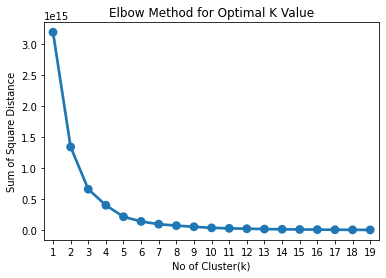

In [43]:
from sklearn.cluster import KMeans

sum_of_sq_dist = {}

for k in range(1,20):
    km = KMeans(n_clusters=k, init='k-means++', max_iter=500)
    km = km.fit(RFMScores1)
    sum_of_sq_dist[k] = km.inertia_
    
sns.pointplot(x= list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel("No of Cluster(k)")
plt.ylabel("Sum of Square Distance")
plt.title("Elbow Method for Optimal K Value")
plt.show()

In [44]:
# Your choice k = 5 or 6 or less or more
kmeans_cluster = KMeans(n_clusters=6, init='k-means++', max_iter=500)
kmeans_cluster.fit(RFMScores1)

KMeans(max_iter=500, n_clusters=6)

In [45]:
RFMScores['Cluster'] = kmeans_cluster.labels_
RFMScores.head(10)

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_level,Cluster
0,2.0,4,63,553704.0,1,1,1,111,3,Platinum,5
1,3.0,77,18,257404.0,4,2,1,421,7,Gold,0
2,4.0,20,10,176613.0,3,3,2,332,8,Gold,0
3,5.0,18,7,41976.0,2,4,3,243,9,Silver,0
4,6.0,9,42,151822.0,1,1,2,112,4,Platinum,0
5,7.0,208,4,9410.0,4,4,4,444,12,Bronze,0
6,8.0,234,10,135550.0,4,3,2,432,9,Silver,0
7,9.0,15,7,65832.0,2,4,3,243,9,Silver,0
8,10.0,16,22,331601.0,2,2,1,221,5,Platinum,5
9,11.0,9,10,771439.0,1,3,1,131,5,Platinum,5


In [46]:
os.getcwd()

'C:\\Users\\Lenovo\\Desktop\\Project\\E-Commerce Analytics'

In [47]:
RFMScores.to_csv('new_cluster_data.csv')

In [48]:
dataset.head()

,CustomerID,Item Code,InvoiceNo,Date,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set,Date1
0,4355.0,15734,398177.0,2017-10-29,6.0,3:36:00 PM,321.0,1926.0,Location 1,NaN,NaN,NaN,2017-10-29
1,4352.0,14616,394422.0,2017-05-10,2.0,2:53:00 PM,870.0,1740.0,Location 1,NaN,NaN,NaN,2017-05-10
2,4352.0,14614,394422.0,2017-12-10,2.0,2:53:00 PM,933.0,1866.0,Location 1,NaN,NaN,NaN,2017-12-10
3,4352.0,85014B,388633.0,2017-08-22,3.0,2:47:00 PM,623.0,1869.0,Location 1,NaN,NaN,NaN,2017-08-22
4,4352.0,15364,394422.0,2017-10-10,2.0,2:53:00 PM,944.0,1888.0,Location 1,NaN,NaN,NaN,2017-10-10
